In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from scipy import signal

df = pd.read_excel('/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/rev_ecit/python/data_rate_2.xlsx')

#df.head(10)

Lying = df[['Lying', 'Unnamed: 2', 'Unnamed: 3']]
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)
#print(Lying)

Sitting = df[['Sitting', 'Unnamed: 5', 'Unnamed: 6']]
Sitting = Sitting.dropna()
Sitting.index = pd.RangeIndex(len(Sitting.index))
Sitting = Sitting.drop(0)
#print(Sitting)

Standing = df[['Standing', 'Unnamed: 8', 'Unnamed: 9']]
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)
#print(Standing)

Walking = df[['Normal walking', 'Unnamed: 11', 'Unnamed: 12']]
Walking = Walking.dropna()
Walking.index = pd.RangeIndex(len(Walking.index))
Walking = Walking.drop(0)
#print(Normal_walking)

Jogging = df[['Active walking', 'Unnamed: 14', 'Unnamed: 15']]
Jogging = Jogging.dropna()
Jogging.index = pd.RangeIndex(len(Jogging.index))
Jogging = Jogging.drop(0)
#print(Active_walking)


<Figure size 432x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0, 4201, '4200')

Text(1, 3433, '3432')

Text(2, 3241, '3240')

Text(3, 4369, '4368')

Text(4, 3031, '3030')

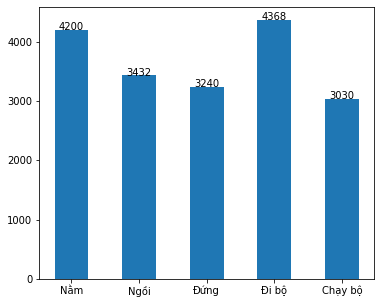

In [4]:
plt.figure (figsize = (6, 5))
label_X = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ']
Value_y =[len(Lying), len(Sitting), len(Standing),len(Walking),len(Jogging)]
plt.bar(x = label_X, height = Value_y , width = [0.5,0.5,0.5,0.5,0.5])
x_values = [0, 1, 2, 3, 4]
for i in range(len(label_X)): # your number of bars
  plt.text(x = x_values[i], #takes your x values as horizontal positioning argument 
  y = Value_y[i]+1, #takes your y values as vertical positioning argument 
  s = Value_y[i], # the labels you want to add to the data
  horizontalalignment='center',
  # verticalalignment='center',
  size = 10)
plt.show()

In [5]:
Walking

,Normal walking,Unnamed: 11,Unnamed: 12
1,-0.79,0.23,0.12
2,-0.85,0.15,-0.03
3,-0.79,0.06,0.06
4,-0.79,0.09,-0.1
5,-0.76,0.09,0.02
...,...,...,...
4364,-1.15,-0.39,-0.15
4365,-0.88,0.57,0.31
4366,-0.88,0.14,0.06
4367,-0.9,0.05,0.05


In [6]:
lying_x = Lying['Lying'][0:200]
lying_y = Lying['Unnamed: 2'][0:200]
lying_z = Lying['Unnamed: 3'][0:200]

sit_x = Sitting['Sitting'][0:200]
sit_y = Sitting['Unnamed: 5'][0:200]
sit_z = Sitting['Unnamed: 6'][0:200]

stand_x = Standing['Standing'][0:200]
stand_y = Standing['Unnamed: 8'][0:200]
stand_z= Standing['Unnamed: 9'][0:200]

jog_x = Jogging['Active walking'][0:200]
jog_y = Jogging['Unnamed: 14'][0:200]
jog_z = Jogging['Unnamed: 15'][0:200]

walk_x = Walking['Normal walking'][0:200]
walk_y = Walking['Unnamed: 11'][0:200]
walk_z = Walking['Unnamed: 12'][0:200]

Text(0.5, 1.0, 'Nằm')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 75.0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ngồi')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Đứng')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 125.0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Đi bộ')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 50.0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Chạy bộ')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 20.0)

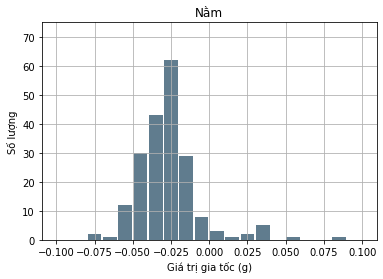

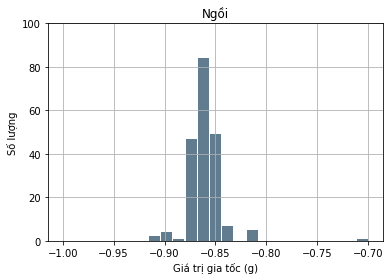

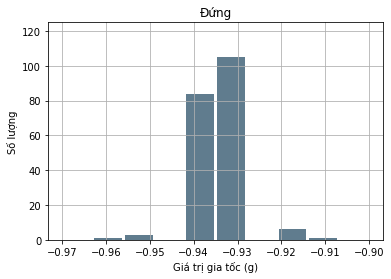

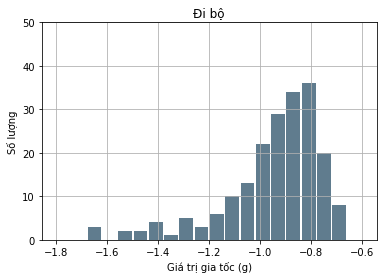

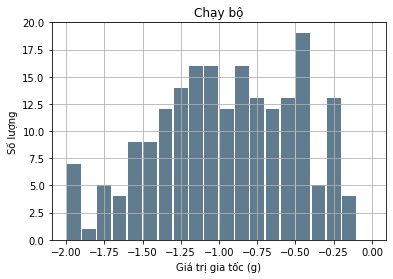

In [7]:
lying_x.plot.hist(grid=True, bins=20, range=[-0.1,0.1], rwidth=0.9, color='#607c8e')   
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Nằm')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,75])

plt.figure(2) # show 2 hình trên 2 cửa sổ figure riêng biệt 

sit_x.plot.hist(grid=True, bins=25, range=[-1.0,-0.7], rwidth=0.9, color='#607c8e')   
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Ngồi')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,100]) 

plt.figure(3) # show 3 hình trên 3 cửa sổ figure riêng biệt 
stand_x.plot.hist(grid=True, bins=10, range=[-0.97,-0.9], rwidth=0.9, color='#607c8e')   
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Đứng')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,125])

plt.figure(4) # show 4 hình trên 4 cửa sổ figure riêng biệt 
walk_x.plot.hist(grid=True, bins=20, range=[-1.8,-0.6], rwidth=0.9,
                   color='#607c8e')
plt.title('Đi bộ')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0, 50])

plt.figure(5) 
jog_x.plot.hist(grid=True, bins=20, range=[-2,0], rwidth=0.9,
                   color='#607c8e')
plt.title('Chạy bộ')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0, 20])



In [20]:
window_size = 10
stride = 5

X_lying= [Lying[i:i+window_size] for i in range(0, int(len(Lying)), stride) if i+window_size<=int(len(Lying))]
print('X_lying: ', len(X_lying))
X_sitting= [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)), stride) if i+window_size<=int(len(Sitting))]
print('X_sitting: ', len(X_sitting))
X_standing = [Standing[i:i+window_size] for i in range(0, int(len(Standing)), stride) if i+window_size<=int(len(Standing))]
print('X_standing: ', len(X_standing))
X_Walking= [Walking[i:i+window_size] for i in range(0, int(len(Walking)), stride) if i+window_size<=int(len(Walking))]
print('X_Walking: ', len(X_Walking))
X_Jogging = [Jogging[i:i+window_size] for i in range(0, int(len(Jogging)), stride) if i+window_size<=int(len(Jogging))]
print('X_Jogging: ', len(X_Jogging))


print('Total:', len(X_sitting) + len(X_standing) + len(X_Walking) + len(X_Jogging) + len(X_lying))

X_lying:  839
X_sitting:  685
X_standing:  647
X_Walking:  872
X_Jogging:  605
Total: 3648


Ngẫu nhiên train test

In [21]:
from sklearn.model_selection import train_test_split #hàm chia ngẫu nhiên tương ứng
RateTrain = 0.7

#chia tập train và test data
arr_lying = np.array(X_lying)
test_lying, train_lying = train_test_split(arr_lying, test_size=RateTrain)

arr_sitting = np.array(X_sitting)
test_sitting, train_sitting = train_test_split(arr_sitting, test_size=RateTrain)

arr_standing = np.array(X_standing)
test_standing, train_standing = train_test_split(arr_standing, test_size=RateTrain)

arr_walking = np.array(X_Walking)
test_walking, train_walking = train_test_split(arr_walking, test_size=RateTrain)

arr_jogging= np.array(X_Jogging)
test_jogging, train_jogging = train_test_split(arr_jogging, test_size=RateTrain)

print('train =  ', len(train_sitting)+ len(train_standing) + len(train_walking) + len(train_jogging) + len(train_lying))
print('test =  ', len(test_sitting)+ len(test_standing) + len(test_walking) + len(test_jogging)+len(test_lying))
print('Total =  ', len(train_lying)+ len(train_sitting)+ len(train_standing) + len(train_walking) + len(train_jogging) + len(test_lying)+ len(test_sitting)+ len(test_standing) + len(test_walking) + len(test_jogging))

train =   2556
test =   1092
Total =   3648


In [22]:
# plt.figure (figsize = (6, 5))
# label_X = ['TR nằm', 'tr_ngồi', 'tr_đứng', 'tr_đi bộ', 'tr_chạy bộ']
# Value_y =[len(Lying), len(Sitting), len(Standing),len(Walking),len(Jogging)]
# plt.bar(x = label_X, height = Value_y , width = 0.2)
# x_values = [0, 1, 2, 3, 4,5,6,7,8,9]
# for i in range(len(label_X)): # your number of bars
#   plt.text(x = x_values[i], #takes your x values as horizontal positioning argument 
#   y = Value_y[i]+1, #takes your y values as vertical positioning argument 
#   s = Value_y[i], # the labels you want to add to the data
#   horizontalalignment='center',
#   # verticalalignment='center',
#   size = 10)
# plt.show()

In [23]:
#tao chuoi du lieu va nhan dung de train
data_train= []
label_train = []

for acts in train_lying:
    data_train.append(pd.DataFrame(acts))
    label_train.append(0)

for acts in train_sitting:
    data_train.append(pd.DataFrame(acts))
    label_train.append(1)
    
for acts in train_standing:
    data_train.append(pd.DataFrame(acts))
    label_train.append(2)

for acts in train_walking:
    data_train.append(pd.DataFrame(acts))
    label_train.append(3)

for acts in train_jogging:
    data_train.append(pd.DataFrame(acts))
    label_train.append(4)



#tao chuoi du lieu va nhan dung de test
data_test= []
label_test = []

for acts in test_lying:
    data_test.append(pd.DataFrame(acts))
    label_test.append(0)

for acts in test_sitting:
    data_test.append(pd.DataFrame(acts))
    label_test.append(1)
    
for acts in test_standing:
    data_test.append(pd.DataFrame(acts))
    label_test.append(2)

for acts in test_walking:
    data_test.append(pd.DataFrame(acts))
    label_test.append(3)

for acts in test_jogging:
    data_test.append(pd.DataFrame(acts))
    label_test.append(4)

print('data_train\'s length: ', len(data_train))
print('label_train\'s length: ', len(label_train))

print('data_test\'s length: ', len(data_test))
print('label_test\'s length: ', len(label_test))

data_train's length:  2556
label_train's length:  2556
data_test's length:  1092
label_test's length:  1092


Trích chọn đặc trưng

In [24]:
# import joblib

# # save
# joblib.dump(data_train,'/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/data_train.pkl')  
# joblib.dump(label_train,'/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/label_train.pkl')  
# joblib.dump(data_test,'/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/data_test.pkl')  
# joblib.dump(label_test,'/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/label_test.pkl')  

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# # %matplotlib inline # plot in cell
# from sklearn import metrics
# import pandas as pd
# from scipy import signal
# from scipy import stats
# import os
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# # for svm
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.svm import SVC
# from scipy.stats import entropy
# import joblib
# data_train= joblib.load('/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/data_train.pkl')  
# label_train = joblib.load('/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/label_train.pkl')  
# data_test = joblib.load('/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/data_test.pkl')  
# label_test= joblib.load('/content/drive/MyDrive/NCS Hieu/cong viec thang 10.2021/code_rev/python/save data/label_test.pkl')  

In [26]:
def featuresFromBuffer(at, fs):
  feat = np.zeros(15)   
  x = np.array(at.iloc[:,0], dtype=np.float64)   
  y = np.array(at.iloc[:,1], dtype=np.float64)   
  z = np.array(at.iloc[:,2], dtype=np.float64)  
  
  means = [np.mean(i) for i in [x, y, z]]
  feat[0:3] = means 
  
  rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
  feat[3:6] = rms

  # Standard deviation
  std = [np.std(i) for i in [x, y, z]]
  feat[6:9] = std

  ## Irq
  irq = [np.percentile(i, [75],interpolation='nearest')- np.percentile(i, [25],interpolation='nearest')  for i in [x, y, z]]
  feat[9:12] = irq
  ## Range
  Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]    
  feat[12:15] = Range
  return feat   
#----------------  
train_features = []
for action in data_train:
  feat = featuresFromBuffer(action, 1)
  train_features.append(feat)
test_features = []
for action in data_test:
  feat = featuresFromBuffer(action, 1)
  test_features.append(feat)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [27]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features)) 
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)   
print('') 
len(train_features)
print('')
len(label_train)
print('')
len(test_features)
print('')
len(label_test) 

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))

2556

2556

1092

1092

In [41]:
def Nofeature(at, fs):
  feat = np.zeros(3)   
  x = np.array(at.iloc[:,0], dtype=np.float64)   
  y = np.array(at.iloc[:,1], dtype=np.float64)   
  z = np.array(at.iloc[:,2], dtype=np.float64)  
  feat[0:3]=[np.sum(i) for i in [x,y,z]]
  # feat[window_size:window_size*2]=y
  # feat[window_size*2:window_size*3]=z
  return feat   
#----------------  
no_features = []
for action in data_train:
  feat = Nofeature(action, 1)
  no_features.append(feat)

In [37]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels, title):
    num_labels = len(class_labels)
    print(num_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#000000', '#00AAFF', '#FF00AA', '#6e8216', '#ff6e00']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels)
    #f = plt.figure(figsize=(10, 10))
    plt.figure(figsize=(9, 9))

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, lw=1)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)
    
    #plt.xlabel('First t-SNE feature')
    #plt.ylabel('Second t-SNE feature')
    plt.title(title, fontsize=20);

    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


5


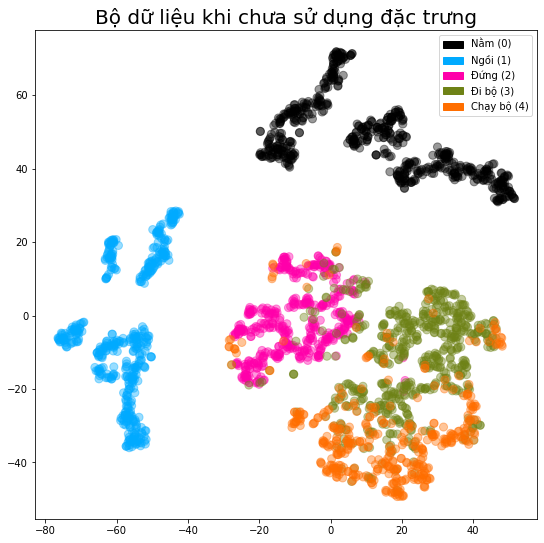

In [42]:
######no features################
x1 = no_features
y1 = label_train
title = "Bộ dữ liệu khi chưa sử dụng đặc trưng"
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)

X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Nằm (0)', 'Ngồi (1)', 'Đứng (2)', 'Đi bộ (3)', 'Chạy bộ (4)'],title)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


5


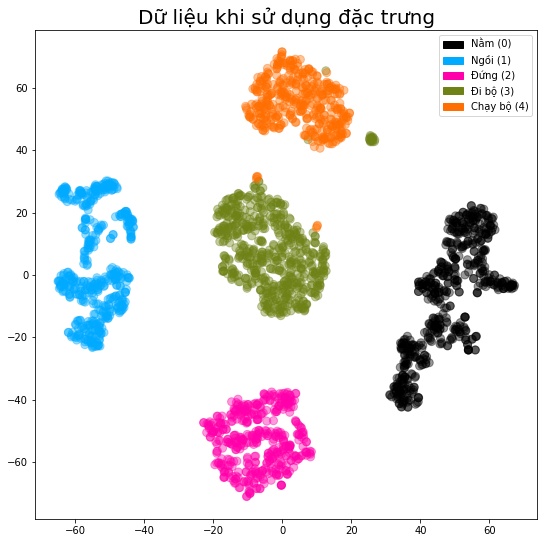

In [31]:
##########full features#################3333333
x1 = train_features
y1 = label_train
title = "Dữ liệu khi sử dụng đặc trưng"
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)

X_tsne1 = TSNE(random_state=RS).fit_transform(x1)

plot_labelled_scatter(X_tsne1, y1,['Nằm (0)', 'Ngồi (1)', 'Đứng (2)', 'Đi bộ (3)', 'Chạy bộ (4)'],title)